## What is the most optimal skill to learn for Data Analysts in the UK?

### Methodogy
1. Group Skills to determine median salary and likelihood of being in job posting
2. Visualise median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

In [1]:
# import libararies
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_da_uk = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

In [4]:
df_da_uk = df_da_uk.dropna(subset=['salary_year_avg'])

df_da_uk_expl = df_da_uk.explode('job_skills')

df_da_uk_expl[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter


In [12]:
df_da_skills = df_da_uk_expl.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_da_skills = df_da_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

da_job_count = len(df_da_uk)

df_da_skills['skill_percent'] = df_da_skills['skill_count'] / da_job_count * 100

skill_percent = 5

df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent'] > skill_percent]

df_da_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,33,98500.0,45.833333
excel,29,75550.0,40.277778
python,25,89100.0,34.722222
tableau,13,100500.0,18.055556
r,9,77017.5,12.500000
go,9,71000.0,12.500000
sas,8,80007.0,11.111111
power bi,7,89100.0,9.722222
outlook,6,53857.0,8.333333


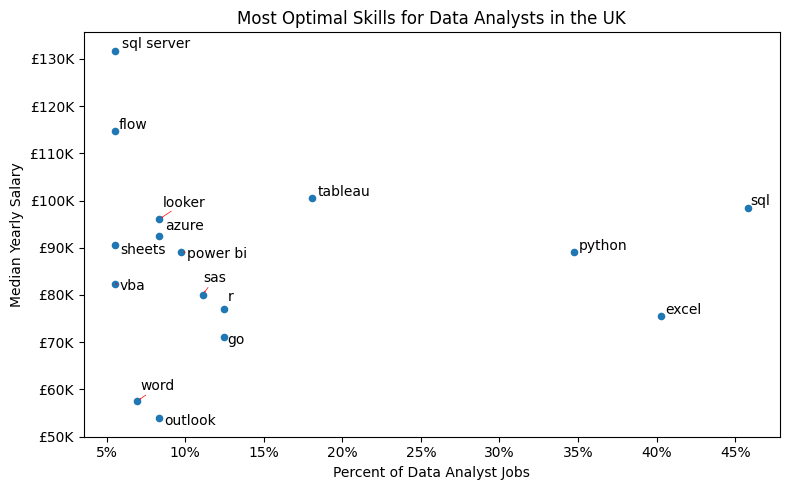

In [21]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_da_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary',figsize=(8, 5))

texts = []
for i, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the UK')
plt.tight_layout()
plt.show()

In [22]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value


for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['powerbi',
  'msaccess',
  'sas',
  'outlook',
  'excel',
  'tableau',
  'ms access',
  'word',
  'ssis',
  'sheets',
  'sharepoint',
  'powerpoint',
  'cognos',
  'visio',
  'alteryx',
  'power bi',
  'spreadsheet',
  'qlik',
  'splunk',
  'nuix',
  'microstrategy',
  'esquisse',
  'sap',
  'spss',
  'datarobot',
  'looker',
  'dax',
  'ssrs'],
 'programming': ['apl',
  'java',
  'sas',
  'javascript',
  'dart',
  'sass',
  'swift',
  'ocaml',
  'bash',
  'rust',
  'vb.net',
  'matlab',
  'scala',
  'pascal',
  'r',
  'html',
  'go',
  'typescript',
  'cobol',
  'sql',
  'julia',
  'python',
  'c',
  'kotlin',
  'f#',
  'elixir',
  'crystal',
  'visualbasic',
  'no-sql',
  'shell',
  'c#',
  'haskell',
  'nosql',
  'fortran',
  'assembly',
  'groovy',
  'mongodb',
  'erlang',
  'mongo',
  't-sql',
  'golang',
  'ruby',
  'css',
  'solidity',
  'php',
  'clojure',
  'lisp',
  'delphi',
  'c++',
  'vba',
  'lua',
  'objective-c',
  'visual basic',
  'perl',
  'powersh

In [23]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,powerbi
0,analyst_tools,msaccess
0,analyst_tools,sas
0,analyst_tools,outlook
0,analyst_tools,excel
...,...,...
9,sync,slack
9,sync,rocketchat
9,sync,microsoft teams
9,sync,twilio


In [24]:
df_DA_skills_tech = df_da_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,33,98500.0,45.833333,programming,sql
1,29,75550.0,40.277778,analyst_tools,excel
2,25,89100.0,34.722222,programming,python
3,13,100500.0,18.055556,analyst_tools,tableau
4,9,77017.5,12.500000,programming,r
...,...,...,...,...,...
59,1,105000.0,1.388889,libraries,gdpr
60,1,53014.0,1.388889,cloud,gcp
61,1,98500.0,1.388889,libraries,pyspark
62,1,177283.0,1.388889,libraries,pytorch


In [37]:
skill_limit = 5

df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,33,98500.0,45.833333,programming,sql
1,29,75550.0,40.277778,analyst_tools,excel
2,25,89100.0,34.722222,programming,python
3,13,100500.0,18.055556,analyst_tools,tableau
4,9,77017.5,12.500000,programming,r
5,9,71000.0,12.500000,programming,go
6,8,80007.0,11.111111,analyst_tools,sas
7,8,80007.0,11.111111,programming,sas
8,7,89100.0,9.722222,analyst_tools,power bi
9,6,53857.0,8.333333,analyst_tools,outlook


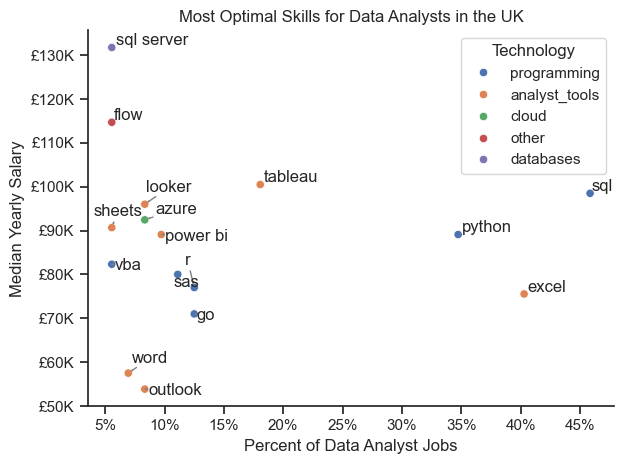

In [38]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology',
)

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the UK')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()